In [17]:
# Lab 2 done by Raj Kumar Ranabhat
# Import Modules and libraries
import numpy as np
import pandas as pd
from sklearn import linear_model
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score 

In [3]:
data_url = 'https://raw.githubusercontent.com/tofighi/MachineLearning/master/datasets/heart.csv'
data = pd.read_csv(data_url, error_bad_lines=False) # Read a comma-separated values (csv) file into DataFrame.
data.head() # visualization of heart.csv file

,row.names,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age,chd
0,1,160,12.00,5.73,23.11,Present,49,25.30,97.20,52,1
1,2,144,0.01,4.41,28.61,Absent,55,28.87,2.06,63,1
2,3,118,0.08,3.48,32.28,Present,52,29.14,3.81,46,0
3,4,170,7.50,6.41,38.03,Present,51,31.99,24.26,58,1
4,5,134,13.60,3.50,27.78,Present,60,25.99,57.34,49,1


In [4]:
print("The values in chd are as follows:")# References # https://towardsdatascience.com/getting-more-value-from-the-pandas-value-counts-aa17230907a6
print(data['chd'].value_counts())
class1 = len(data[data['chd'] == 1].index)/ len(data)
print("Percentage of class 1 i.e having coronary heart disease = ", round(class1*100,2), "%")
print("Percentage of class 0 i.e having no coronary heart disease = ", 100 - round(class1*100,2), "%") # 

The values in chd are as follows:
0    302
1    160
Name: chd, dtype: int64
Percentage of class 1 i.e having coronary heart disease =  34.63 %
Percentage of class 0 i.e having no coronary heart disease =  65.37 %


In [5]:
print("Missing values are as follows:")  #  https://www.datacamp.com/community/tutorials/categorical-data
print(data.isnull().sum())

Missing values are as follows:
row.names    0
sbp          0
tobacco      0
ldl          0
adiposity    0
famhist      0
typea        0
obesity      0
alcohol      0
age          0
chd          0
dtype: int64


In [6]:
print("Column data types are as follows:")
print(data.info())   # The columns with object dtype are the possible categorical features in your dataset.
print("Number of categorical variables in features: 1")

Column data types are as follows:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 462 entries, 0 to 461
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   row.names  462 non-null    int64  
 1   sbp        462 non-null    int64  
 2   tobacco    462 non-null    float64
 3   ldl        462 non-null    float64
 4   adiposity  462 non-null    float64
 5   famhist    462 non-null    object 
 6   typea      462 non-null    int64  
 7   obesity    462 non-null    float64
 8   alcohol    462 non-null    float64
 9   age        462 non-null    int64  
 10  chd        462 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 39.8+ KB
None
Number of categorical variables in features: 1


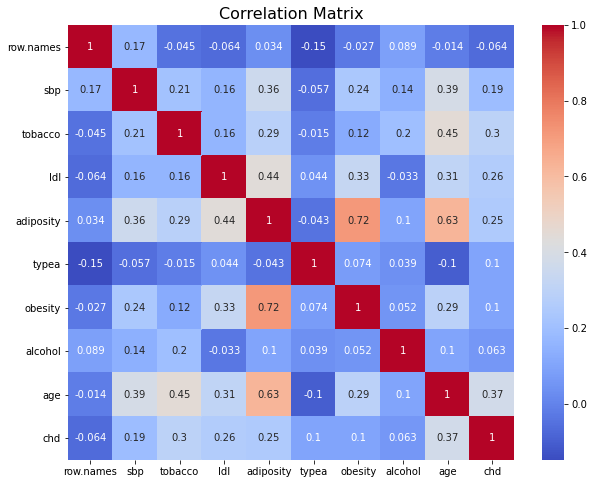

In [7]:
#Using Pearson Correlation, https://towardsdatascience.com/feature-selection-with-pandas-e3690ad8504b
plt.figure(figsize=(10,8))
cor = data.corr()
#sns.heatmap(cor, annot=True, cmap= plt.cm.Reds)
sns.heatmap(cor, annot=True, cmap= "coolwarm")
plt.title('Correlation Matrix', fontsize=16)
plt.show()

In [8]:
# https://towardsdatascience.com/what-is-one-hot-encoding-and-how-to-use-pandas-get-dummies-function-922eb9bd4970
One_Hot=pd.get_dummies(data.famhist, prefix='familyhist')
data = pd.concat([data, One_Hot], axis=1)
data =data.drop('famhist', 'columns')
print("One-hot encoding of famhist ")
data.head()

One-hot encoding of famhist 


,row.names,sbp,tobacco,ldl,adiposity,typea,obesity,alcohol,age,chd,familyhist_Absent,familyhist_Present
0,1,160,12.00,5.73,23.11,49,25.30,97.20,52,1,0,1
1,2,144,0.01,4.41,28.61,55,28.87,2.06,63,1,1,0
2,3,118,0.08,3.48,32.28,52,29.14,3.81,46,0,0,1
3,4,170,7.50,6.41,38.03,51,31.99,24.26,58,1,0,1
4,5,134,13.60,3.50,27.78,60,25.99,57.34,49,1,0,1


In [9]:
def z_score(df):  # Normalization using z score
    # copy the dataframe
    df_std = df.copy()
    df_std_2 =df_std.iloc[:, :-2]
    # apply the z-score method
    for column in df_std_2.columns:
        df_std[column] = (df_std[column] - df_std[column].mean()) / df_std[column].std()        
    return df_std

In [10]:
# Splitting our DataFrame to features and target for training
datafeatures = data[['sbp', 'tobacco', 'ldl', 'adiposity', 'typea', 'obesity', 'alcohol', 'age', 'familyhist_Absent', 'familyhist_Present']]
datatargets = data[['chd']]

In [11]:
datafeatures=z_score(datafeatures)
datafeatures.insert(0,'x0',1) #added a column to represent 'x0' to simplify while training and x0 is always 1.


In [12]:
np.random.seed(30)  # The pseudorandom number generation with same sequence of random numbers
thetas = np.random.rand(len(datafeatures.columns))

In [1061]:
def sigmoid(x):  # https://towardsdatascience.com/building-a-logistic-regression-in-python-301d27367c24
    # Activation function used to map any real value between 0 and 1
    return 1 / (1 + np.exp(-x))


In [1062]:
def net_input(thetas, x):
    # Computes the weighted sum of inputs
    return np.dot(x, thetas)

In [1063]:
def probability(theta, x):
    # Returns the probability after passing through sigmoid
    return sigmoid(net_input(theta, x))

In [1064]:
def cost_function(thetas, datafeatures, datatargets): # https://towardsdatascience.com/building-a-logistic-regression-in-python-301d27367c24
    # Computes the cost function for all the training samples
   # m = x.shape[0]
  m = len(datafeatures)
  total_cost = 0
  for i in range(m):
    total_cost = total_cost + np.sum(datatargets[i] * np.log(probability(thetas, datafeatures[i])) + (1 - datatargets[i]) * np.log(1 - probability(thetas, datafeatures[i])))
  return total_cost * - (1 / m)

In [1020]:
def gradient(thetas,datafeatures,datatargets,alpha):
    # Computes the gradient of the cost function at the point theta
    updated_thetas = list()
    m = len(datafeatures)    
    for j in range(len(thetas)):
        grad_dec= 0
        for i in range(m):    
            grad_dec=grad_dec + datafeatures[i][j] * (datatargets[i] - probability(thetas,datafeatures[i]))
            #grad_dec= grad_dec + np.dot(datafeatures[i], sigmoid(net_input(thetas,datafeatures[i])) - datatargets[i])  
       # newtheta=  alpha * grad_dec
        grad_dec =  grad_dec * 1 / m
        updated_thetas.append(thetas[j] + alpha * grad_dec )
    return updated_thetas      

In [1021]:
def datasampled(datafeatures,n):  # manupulation of dataframe
    datasampled=list()
    for i in range(0, len(datafeatures), n):       
        z = datafeatures[i:i + n]
        datasampled.append(z) 
    return datasampled

In [1022]:
def batch(data_old): # converison of panda data frame to numpy array for faster processing while training
    datanew_batches=list()
    for batch in data_old:
        data_old = batch.to_numpy()
        datanew_batches.append(data_old) 
    return( datanew_batches)

In [1023]:
def printerror(error, title):   # function to print the graph of loss function / error
    plt.plot(range(1, len(error) + 1), error, color='b')
    plt.xlabel("Epochs")
    plt.ylabel("Error")
    plt.title(title)
    plt.show()

In [1024]:
def trainingmodel(thetas, datafeatures, datatargets, alpha, epochs, batch_size): # define a model with this function
    cost = []
   # change pandas dataframe into a numpy array for faster processing through training process.
    if (batch_size == 0):
        datafeatures_batches = [datafeatures.to_numpy()]
        datatargets_batches = [datatargets.to_numpy()]
        batch_size = len(datafeatures.index)
    else:
        datafeatures_batches = datasampled(datafeatures, batch_size)
        datatargets_batches = datasampled(datatargets, batch_size)
        datafeatures_batches = batch(datafeatures_batches)
        datatargets_batches = batch(datatargets_batches)
    datafeatures = datafeatures.to_numpy()
    datatargets = datatargets.to_numpy()

    for i in range( epochs):
        for j in range(len(datafeatures_batches)):
            thetas = gradient(thetas, datafeatures_batches[j], datatargets_batches[j], alpha)
        cost.append(cost_function(thetas, datafeatures, datatargets))
        if (i == 500 or i == 1000 or i == 10000):
           printerror(cost, "Cost through {} epochs (alpha = {}, batch_size = {})".format(i, alpha, batch_size))        
    printerror(cost, "Cost Through {} epochs (alpha = {}, batch_size = {})".format(epochs, alpha, batch_size))
    print("Updated thetas:{}".format(thetas))
    updatedtheta = thetas
    return updatedtheta
    


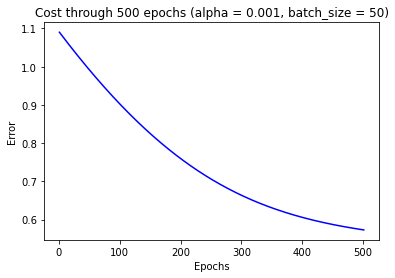

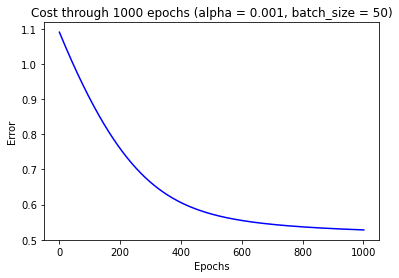

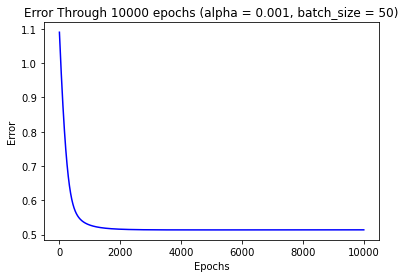

Updated thetas:[array([-0.45883242]), array([0.07889662]), array([0.3438743]), array([0.28843597]), array([0.36115387]), array([0.27457566]), array([-0.37629158]), array([0.01241485]), array([0.50522353]), array([-0.70209329]), array([0.14204175])]


In [1034]:
#parameters= trainingmodel(thetas, datafeatures, datatargets, 0.001,10000, 0)
#parameters= trainingmodel(thetas, datafeatures, datatargets, 0.0001,10000, 50)     
#parameters= trainingmodel(thetas, datafeatures, datatargets, 0.001,10000, 0)
parameters= trainingmodel(thetas, datafeatures, datatargets, 0.0001,10000, 50)

In [1037]:
def predict(x):    # https://towardsdatascience.com/building-a-logistic-regression-in-python-301d27367c24
    theta = parameters
    return probability(theta, x) 

def accuracy(x, actual_classes, probab_threshold=0.5): # define a function to calculate an accuracy of the model
    predicted_classes = (predict(x) >= probab_threshold).astype(int)
    predicted_classes = predicted_classes 
    accuracy = np.mean(predicted_classes == actual_classes)
    return accuracy * 100


In [1038]:
acc=accuracy(datafeatures,datatargets) # call model accuracy based on same training data. By the way in real scenario we dont do this. 
print("Accuracy of the trained model:{}".format(acc))

Accuracy of the trained model:chd    74.025974
dtype: float64


In [21]:
# Reproduce the result again using the sklearn model to validate/compare result to our build model.
model = LogisticRegression()   # https://towardsdatascience.com/building-a-logistic-regression-in-python-301d27367c24
model.fit(datafeatures, np.ravel(datatargets.T))   
predicted_classes = model.predict(datafeatures)
accuracy = accuracy_score(datatargets,predicted_classes)
print("Model trained with sklearn has the following thetas:")
print(np.hstack((model.intercept_[:,None], model.coef_)))
print("Accuracy: {} ".format(accuracy))

Model trained with sklearn has the following thetas:
[[-7.95643958e-01  2.56893656e-05  1.33056242e-01  3.61797899e-01
   3.55621553e-01  1.42841644e-01  3.79769926e-01 -2.55983642e-01
   3.65472155e-03  6.48247641e-01 -4.51368504e-01  4.51394193e-01]]
Accuracy: 0.7337662337662337 
